In [8]:
%load_ext autoreload
%autoreload 2

import networkx as nx

from qiskit_optimization.applications.ising.max_cut import Maxcut

from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer, RecursiveMinimumEigenOptimizer



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


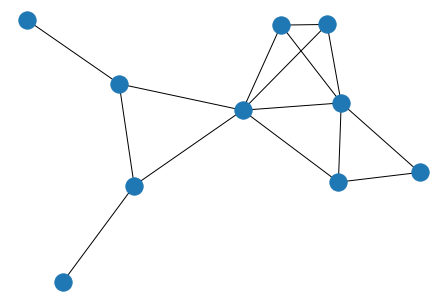

In [9]:
g=nx.gnm_random_graph(10,15, 123)
pos = nx.spring_layout(g)
nx.draw(g, pos=pos)

In [10]:
# Pass networkx's graph to the constructor of `Maxcut`
maxcut = Maxcut(g)

In [11]:
# Use `maxcut.to_quadratic_problem` to create a `QuadraticProgram` 
qp=maxcut.to_quadratic_problem()
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: docplex_model2

Maximize
 obj: 6 x_0 + 4 x_1 + 2 x_2 + x_4 + x_5 + x_6 + [ - 2 x_0*x_1 - 2 x_0*x_2
      - 2 x_0*x_4 - 2 x_0*x_5 - 2 x_0*x_6 - 2 x_0*x_7 - 2 x_1*x_4 - 2 x_1*x_6
      - 2 x_1*x_7 - 2 x_1*x_9 - 2 x_2*x_3 - 2 x_2*x_5 - 2 x_4*x_7 - 2 x_5*x_8
      - 2 x_6*x_9 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1
 0 <= x_5 <= 1
 0 <= x_6 <= 1
 0 <= x_7 <= 1
 0 <= x_8 <= 1
 0 <= x_9 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4 x_5 x_6 x_7 x_8 x_9
End

Note that $ \it{max} \sum_{i, j} w_{i,j} x_i (1-x_j)$ is used for the objective function of the max cut.

In [12]:
# Solve the created problem with `NumPyMinimumEigensolver`
exact_mes = NumPyMinimumEigensolver()
exact = MinimumEigenOptimizer(exact_mes)
exact_result = exact.solve(qp)
print(exact_result)

optimal function value: 10.0
optimal value: [1. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
status: SUCCESS


In [13]:
# We can check the feasibility and object value by passing a list of values
# Note that since `x` is just a list, a user can try theirown "values"". It does not need to be a `OptimizationResut`
x = exact_result.x
print(x)
print(maxcut.is_feasible(x))
print(maxcut.objective_value(x))


[1. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
True
10.0


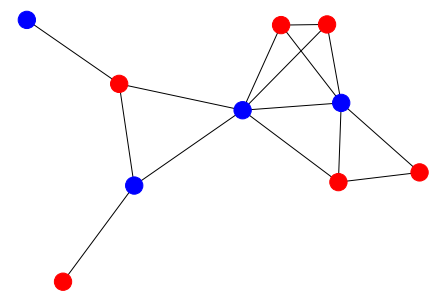

In [14]:
# Plot a graph for the maxcut with `x`. 
# `plot_graph()` should be unique to a problem.
# For example, for the TSP, we should have the visiting order on each node instead of coloring in two colors.
maxcut.plot_graph(x, pos)

In [18]:
# maxcut.g() is used as getter
my_g = maxcut.g()

# It returns the copy of the self._g, so even though a user modify the `my_g`, the internal graph which was used to create a QP does not change
# def g(self):
#     return copy.deepcopy(self._g)
